In [1]:
#load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [63]:
#load Dataset
df=pd.read_csv("C:\\Users\\Hp\\Downloads\\loan\\loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#checking the null values
pd.set_option('display.max_rows',None)
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [6]:
df.isnull().mean()

id                                0.000000
member_id                         0.000000
loan_amnt                         0.000000
funded_amnt                       0.000000
funded_amnt_inv                   0.000000
term                              0.000000
int_rate                          0.000000
installment                       0.000000
grade                             0.000000
sub_grade                         0.000000
emp_title                         0.061913
emp_length                        0.027066
home_ownership                    0.000000
annual_inc                        0.000000
verification_status               0.000000
issue_d                           0.000000
loan_status                       0.000000
pymnt_plan                        0.000000
url                               0.000000
desc                              0.325805
purpose                           0.000000
title                             0.000277
zip_code                          0.000000
addr_state 

In [7]:
#checking percentage of missing values
round((100*df.isnull().sum())/len(df.index))

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [5]:
#drop all the columns which contains 100% Nan Data
loan_df.dropna(axis=1,how='all',inplace=True)
round((100*loan_df.isnull().sum())/len(loan_df.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [64]:
#drop columns in which missing value is very high in percentage
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 108 entries, id to total_il_high_credit_limit
dtypes: float64(72), int64(13), object(23)
memory usage: 32.7+ MB


In [65]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
#finding out the percentage of missing data in rowwise
round((100*df.isnull().sum(axis=1))/len(df.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
50       0.0
51       0.0
52       0.0
53       0.0
54       0.0
55       0.0
56       0.0
57       0.0
58       0.0
59       0.0
60       0.0
61       0.0
62       0.0
63       0.0
64       0.0
65       0.0
66       0.0
67       0.0
68       0.0
69       0.0
70       0.0
71       0.0
72       0.0
73       0.0
74       0.0
75       0.0
76       0.0

In [66]:
#values in target
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [67]:
#drop Current loan status from the rows becuase it will not provide any past data it it still in running mode
status_list = ['Fully Paid','Charged Off']
df=df[df['loan_status'].isin(status_list)]
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [138]:
#convert loan status into numerical column
df['loan_status'].replace(['Fully Paid', 'Charged Off'],
                        [0, 1], inplace=True)

In [133]:
#Extract columns whose missing values are not more than mean of .80
df=df.loc[:,('loan_amnt','term','int_rate','grade','emp_length',
              'home_ownership','annual_inc','issue_d','loan_status','purpose',
             'addr_state','dti',)]
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [136]:
df.term = (df['term'].apply(lambda x:x.rstrip('months'))).astype('int64')

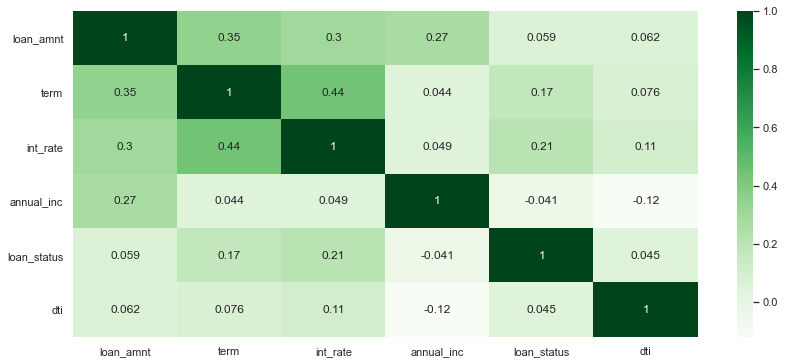

In [139]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), cmap='Greens', annot=True)
plt.show()

### also dropping the funded amnt and funded amnt inv as they are almost similar in behaviour to loan amount

In [143]:
#create new column from the existing column
df['loan_year'] = df['issue_d'].apply(lambda x:x.split('-')[1])
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,loan_year
0,5000,36,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [144]:
#convert the data type from string to int and check the type
df['loan_year']=df['loan_year'].astype('int64')
df['loan_year'].value_counts()

11    20516
10    11532
9      4716
8      1562
7       251
Name: loan_year, dtype: int64

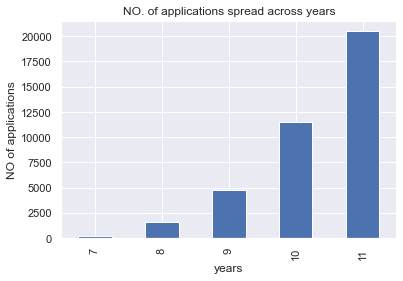

In [145]:
df['loan_year'].value_counts().sort_values().plot(kind='bar')
plt.title("NO. of applications spread across years")
plt.xlabel("years")
plt.ylabel("NO of applications")

plt.show()

### NO of applications for loan were increased with the years. 

# univariate and bivariate analysis

In [73]:
#change the type of int_rate column from string to float
df.int_rate = (df['int_rate'].apply(lambda x:x.rstrip('%'))).astype('float64')
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [74]:
#create new column from the existing column
df['month'] = loan_df['issue_d'].apply(lambda x:x.split('-')[0])
df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,loan_year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


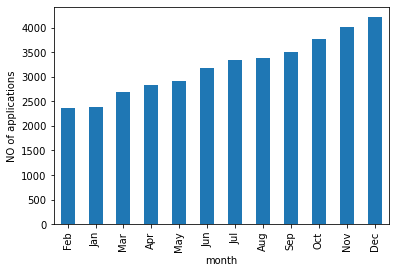

In [33]:
df['month'].value_counts().sort_values().plot(kind='bar')
plt.title("NO. of applications spread across the months")
plt.xlabel("month")
plt.ylabel("NO of applications")

plt.show()

### There is more number of applications in the month of december. 

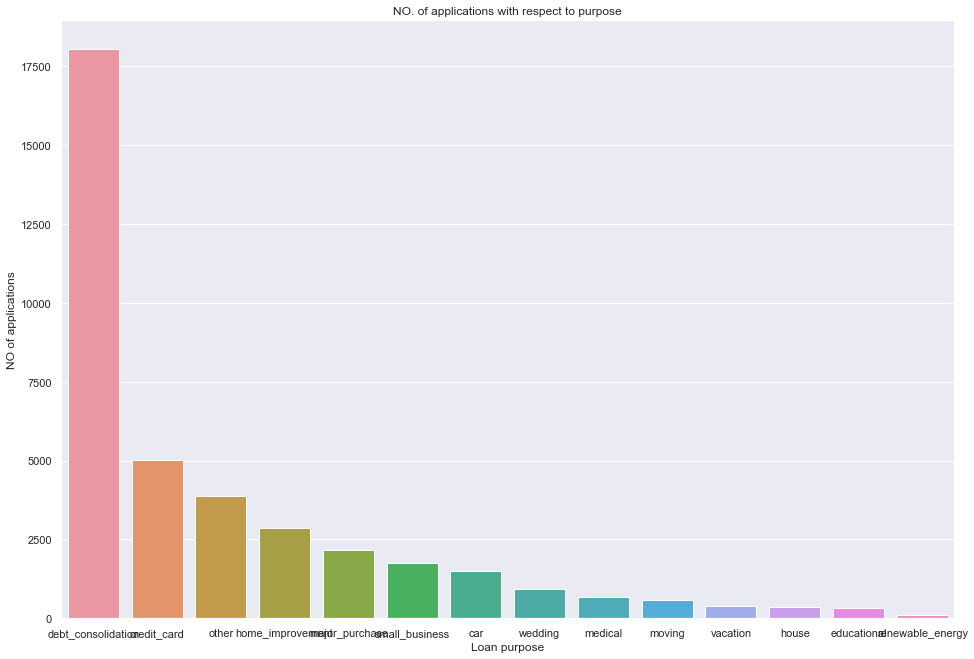

In [146]:
#Count plot to show the different loan purpose from the lending clubs
plt.figure(figsize=(16,11))
sns.countplot(x='purpose',data=df,order=df['purpose'].value_counts().index)
plt.title("NO. of applications with respect to purpose")
plt.xlabel("Loan purpose")
plt.ylabel("NO of applications")

plt.show()

### There are five major purposes of Loan applications  are - ‘debt_consolidation’ , ‘credit_card’ , ‘other’ , ‘home_improvement’ & ‘major_purchase’

### debt_consolidation’ is the highest loan purpose 


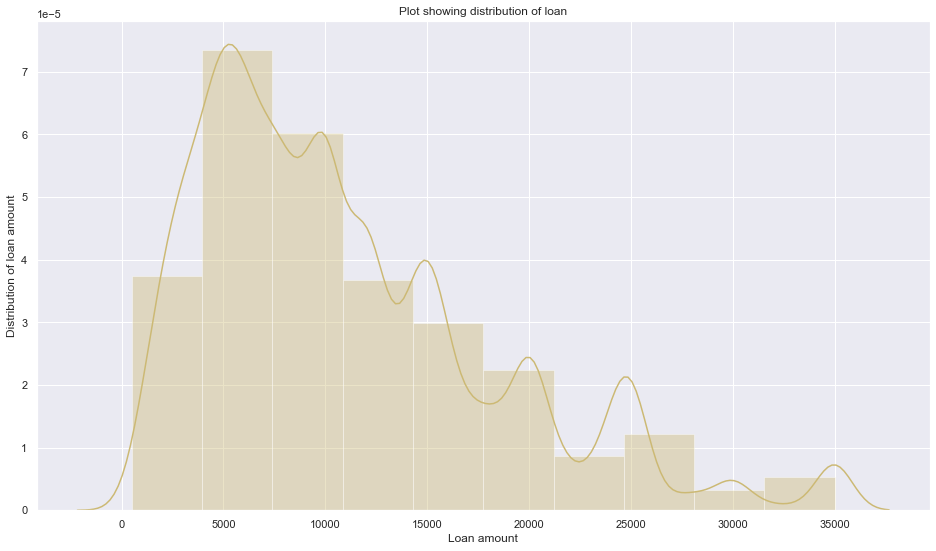

In [147]:
#loan amount distribution 
plt.figure(figsize=(16,9))
sns.distplot(df['loan_amnt'],bins=10,color='y')
plt.title("Plot showing distribution of loan")
plt.xlabel("Loan amount")
plt.ylabel("Distribution of loan amount")

plt.show()

### It has been observed that the maximum loan range amount is between 5000-10000


In [77]:
#create a separate dataframe of defaulters
defaulter = pd.DataFrame()
defaulter= df.loc[(df['loan_status'] ==1)]

In [79]:
defaulter.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,loan_year,month
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.28,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.69,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.49,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.65,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


In [81]:
#calculate the percentage of loan defaulters with respect to grade
grade=pd.DataFrame(data=round((100*defaulter['grade'].value_counts())/df['grade'].value_counts(),2))
grade.rename(columns={'grade':'defaulters_perc'},inplace=True)
grade

,defaulters_perc
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


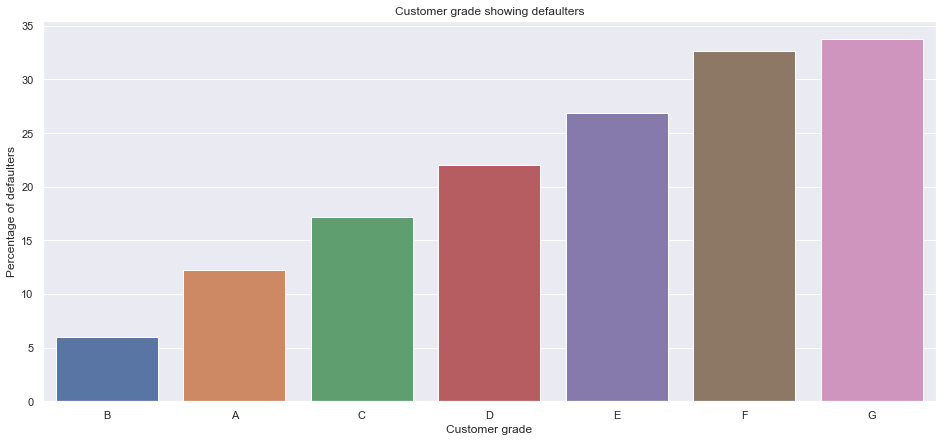

In [148]:
plt.figure(figsize=(16,7))
sns.barplot(x=grade_df.index,y='defaulters_perc',data=grade)
plt.title("Customer grade showing defaulters")
plt.xlabel("Customer grade")
plt.ylabel("Percentage of defaulters")

plt.show()

### Borrowers having  Grade G group are have high percentage of defaulters

In [83]:
#calculate the percentage of loan defaulters according to loan purpose
purpose=pd.DataFrame(data=round((100*defaulter['purpose'].value_counts())/df['purpose'].value_counts(),2))
purpose.rename(columns={'purpose':'defaulters_perc'},inplace=True)
purpose

,defaulters_perc
car,10.67
credit_card,10.78
debt_consolidation,15.33
educational,17.23
home_improvement,12.07
house,16.08
major_purchase,10.33
medical,15.57
moving,15.97
other,16.38


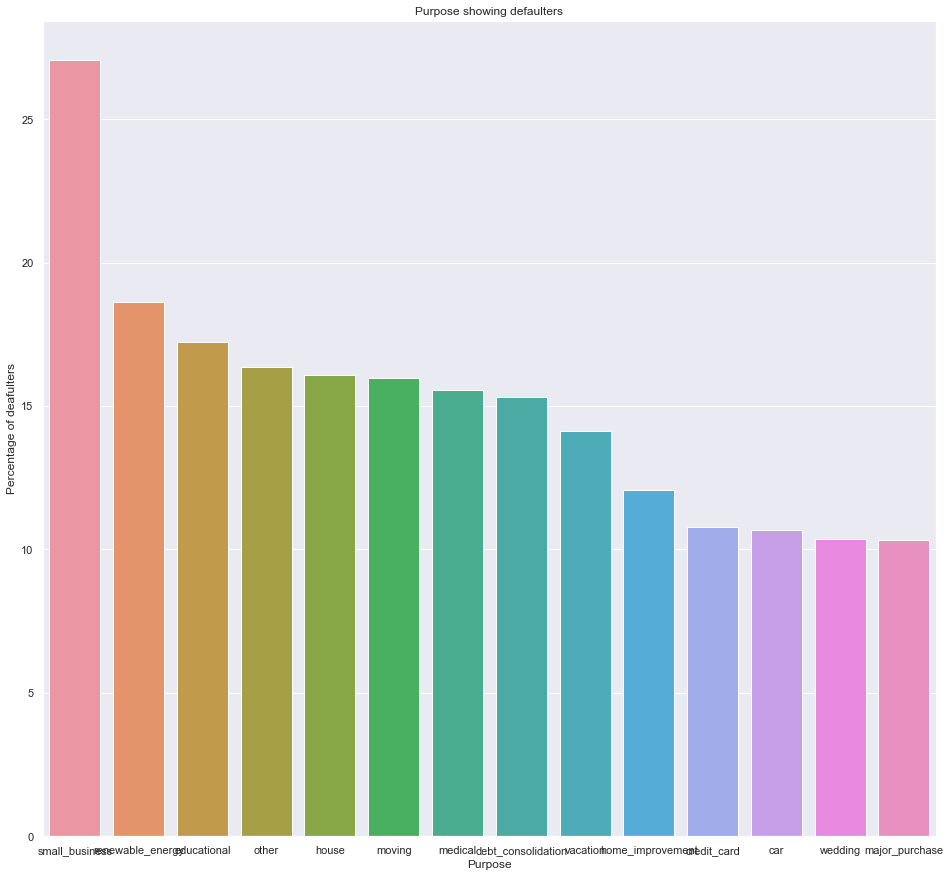

In [149]:
plt.figure(figsize=(16,15))
purpose.sort_values(by='defaulters_perc',ascending=False,inplace=True)
sns.barplot(x=purpose.index,y='defaulters_perc',data=purpose)
plt.title("Purpose showing defaulters")
plt.xlabel("Purpose")
plt.ylabel("Percentage of deafulters")

plt.show()

### The percentage of risk of Defaulters is the largest in the Loan Purpose – ‘small_business’ .

In [97]:
#calculate the percentage of loan defaulters according to Employee experience
emp=pd.DataFrame(data=round((100*defaulter['emp_length'].value_counts())/df['emp_length'].value_counts(),2))
emp.rename(columns={'emp_length':'defaulter_perc'},inplace=True)
emp

,defaulter_perc
10+ years,15.68
< 1 year,14.17
2 years,13.21
3 years,13.83
4 years,13.82
5 years,14.34
1 year,14.39
6 years,14.16
7 years,15.37
8 years,14.15


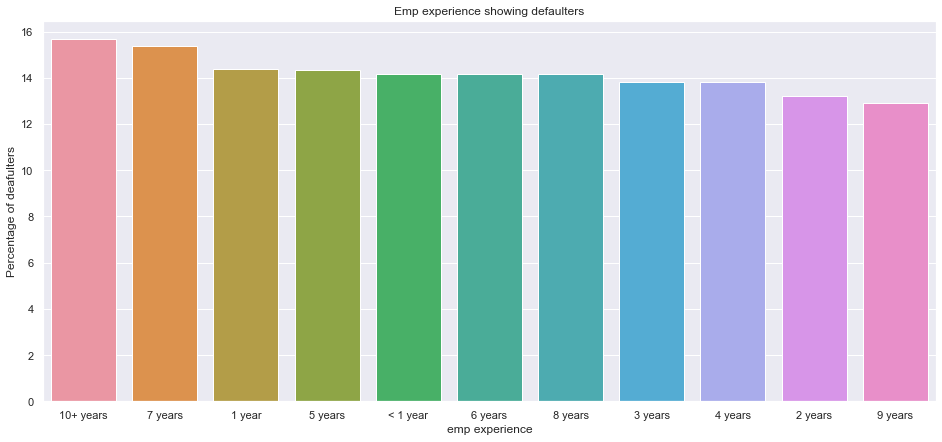

In [150]:
plt.figure(figsize=(16,7))
emp.sort_values(by='defaulter_perc',ascending=False,inplace=True)
sns.barplot(x=emp.index,y='defaulter_perc',data=emp)
plt.title("Emp experience showing defaulters")
plt.xlabel("emp experience")
plt.ylabel("Percentage of deafulters")

plt.show()

### The percentage of risk of Defaulters is maximum for customer experience - 10+ years & minimum for 9 year’s experience

In [102]:
#calculate the percentage of loan defaulters according to home onwership
home=pd.DataFrame(data=round((100*defaulter['home_ownership'].value_counts())/df['home_ownership'].value_counts(),2))
home.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home.head()

,defaulter_perc
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67
NONE,NaN


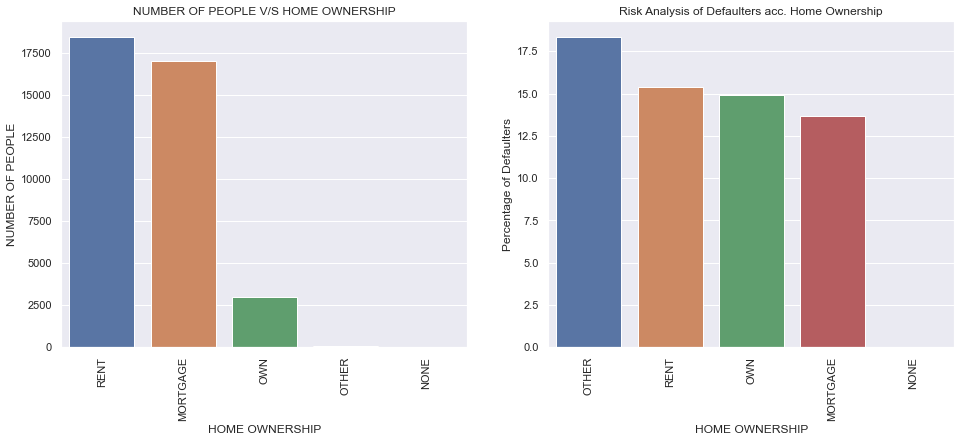

In [107]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='home_ownership',data=df,order=df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
ax=sns.barplot(x=home.index,y='defaulter_perc',data=home)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
plt.xticks(rotation=90)
plt.show()

### The percentage of defaulter under home ownership is  “Other” followed by “Rent” and “Own” and “Mortgage”

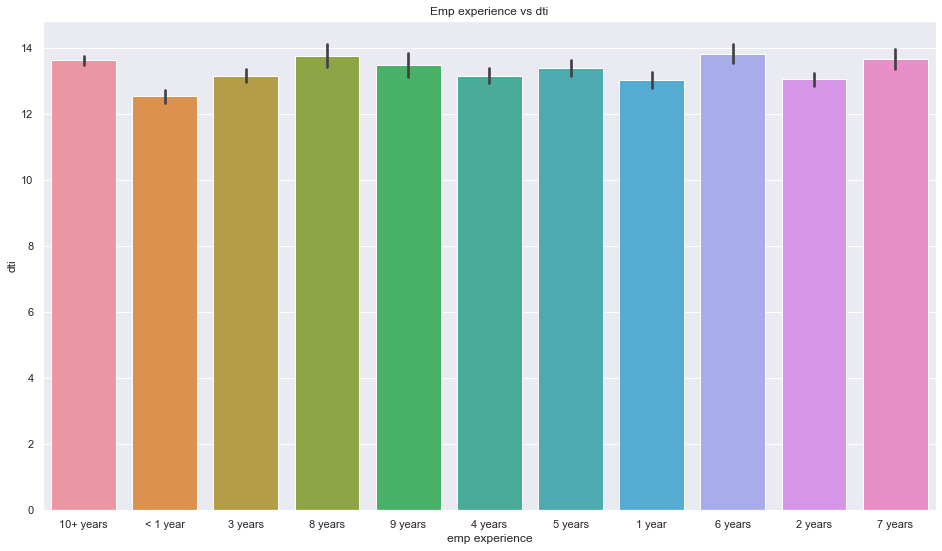

In [151]:
plt.figure(figsize=(16,9))
sns.barplot(x='emp_length',y='dti',data=df)
plt.title("Emp experience vs dti")
plt.xlabel("emp experience")
plt.ylabel("dti")

plt.show()

### By doing bivariate analysis it has been observed that  10+ years of employee exp. Is having debt to income in maximum range  apart from that rest year of employee exp. are more or less in same range.

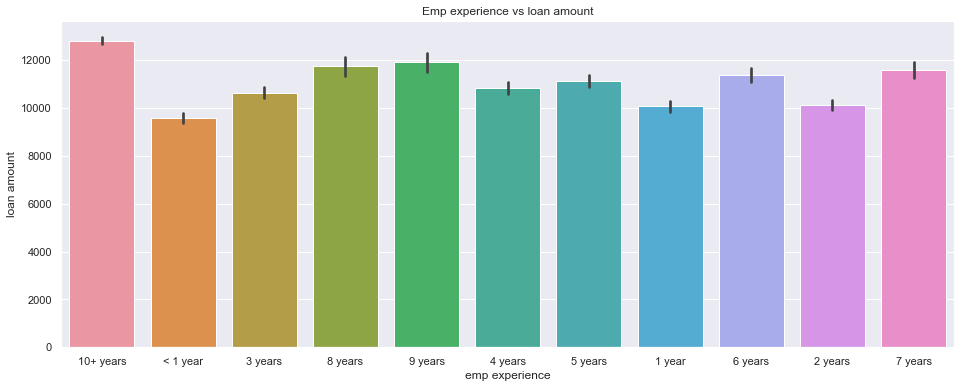

In [152]:
plt.figure(figsize=(16,6))
sns.barplot(x='emp_length',y='loan_amnt',data=df)
plt.title("Emp experience vs loan amount")
plt.xlabel("emp experience")
plt.ylabel("loan amount")

plt.show()

### By doing bivariate analysis it has been observed that the employee exp. With 10+ years is taking more amount of loan and those who are less than 1 year is taken less amount of loan.

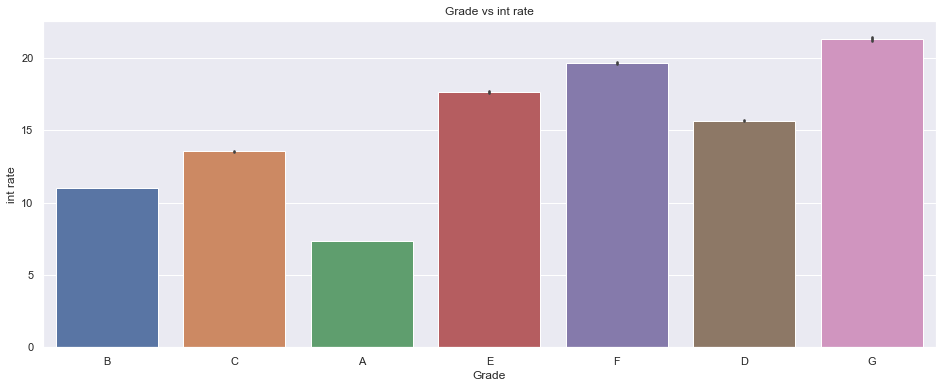

In [153]:
plt.figure(figsize=(16,6))
sns.barplot(x='grade',y='int_rate',data=df)
plt.title("Grade vs int rate")
plt.xlabel("Grade")
plt.ylabel("int rate")

plt.show()

### From the above plot it has been visualize that based on grade interest rate is going higher – “A”  is having minimum interest rate, whereas “B” is having higher interest rate.

In [115]:
grade_group = df.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [116]:
emp_group = df.groupby('emp_length')
emp_group['loan_amnt'].median()

emp_length
1 year        8000
10+ years    11000
2 years       8400
3 years       9225
4 years       9600
5 years      10000
6 years      10000
7 years      10000
8 years      10000
9 years      10000
< 1 year      8000
Name: loan_amnt, dtype: int64

In [118]:
#calculate the percentage of loan defaulters according to address of a state
state=pd.DataFrame(data=round((100*defaulter['addr_state'].value_counts())/df['addr_state'].value_counts(),2))
state.rename(columns={'addr_state':'defaulter_perc'},inplace=True)
state.sort_values(by='defaulter_perc',ascending=False,inplace=True)
state.head(10)


,defaulter_perc
NE,60.00
NV,22.55
SD,19.35
AK,19.23
FL,18.12
MO,17.01
HI,16.87
ID,16.67
NM,16.39
OR,16.32


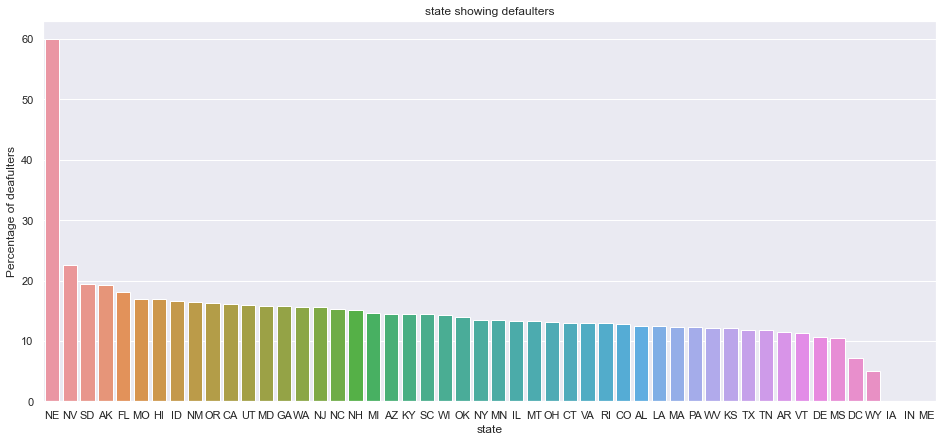

In [154]:
plt.figure(figsize=(16,7))
sns.barplot(x=state.index,y='defaulter_perc',data=state)
plt.title("state showing defaulters")
plt.xlabel("state")
plt.ylabel("Percentage of deafulters")

plt.show()

### The percentage of  Defaulters is maximum from NE (address) which is 60% 

In [120]:
#calculate the percentage of loan defaulters according to term
term=pd.DataFrame(data=round((100*defaulter['term'].value_counts())/df['term'].value_counts(),2))
term.rename(columns={'term':'defaulter_perc'},inplace=True)
term.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term

,defaulter_perc
60 months,25.31
36 months,11.09


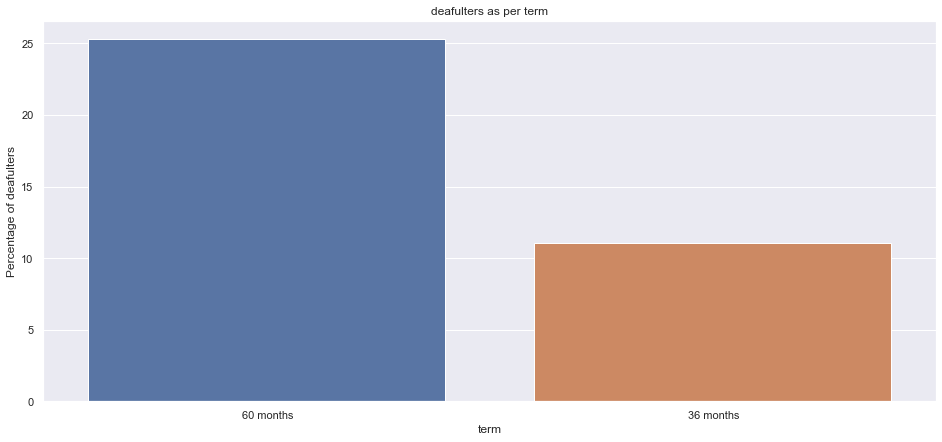

In [155]:
plt.figure(figsize=(16,7))
sns.barplot(x=term.index,y='defaulter_perc',data=term)
plt.title("deafulters as per term")
plt.xlabel("term")
plt.ylabel("Percentage of deafulters")

plt.show()

### The percentage of Defaulters is found in 60 months as compared to 36 months – Loan Term

### Outlier detection

<AxesSubplot:xlabel='loan_amnt'>

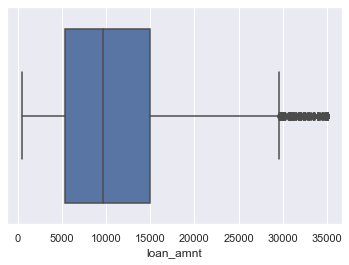

In [122]:
sns.boxplot(df['loan_amnt'])

### Very few people have taken loan more than 30000

<AxesSubplot:xlabel='int_rate'>

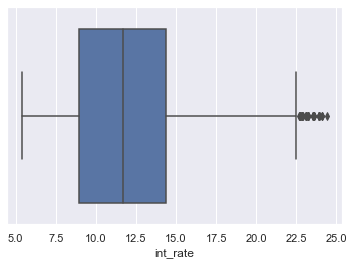

In [123]:
sns.boxplot(df['int_rate'])

### Very few loan application have interest rate more than 22.5 percent 

<AxesSubplot:>

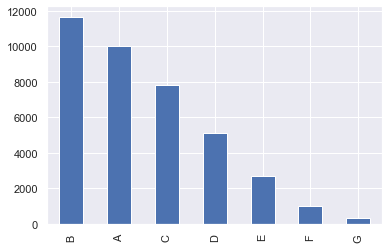

In [125]:
df['grade'].value_counts().plot(kind='bar')

### There are more number of borrowers having grade B

<AxesSubplot:>

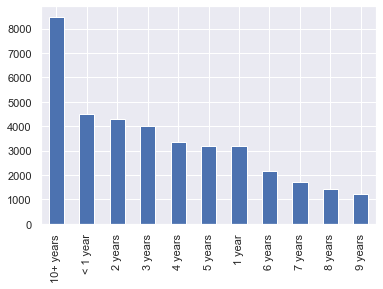

In [126]:
df['emp_length'].value_counts().plot(kind='bar')

### More number of borrowers are there whose experience is more than 10 years

In [127]:
df.loc[df['annual_inc'].between(0, 50000.00, 'both'), 'income'] = 'less than 50k'
df.loc[df['annual_inc'].between(50000.00,100000.00, 'right'), 'income'] = 'between 50k-1lac'
df.loc[df['annual_inc'].between(100000.00, 150000.00, 'right'), 'income'] = 'between 1lac-1.5lac'
df.loc[df['annual_inc'].between(150000.00 ,200000.00, 'right'), 'income'] = 'between 1.5lac-2lac'

<AxesSubplot:>

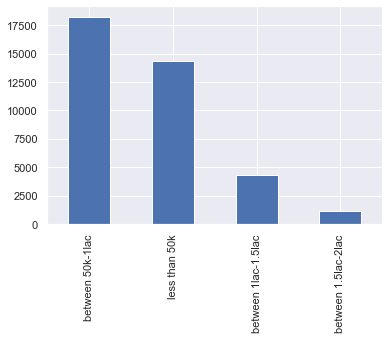

In [128]:
df['income'].value_counts().plot(kind='bar')   

### There are more number of people whose annual income falls in between 50k and 1 lac 

<AxesSubplot:xlabel='dti'>

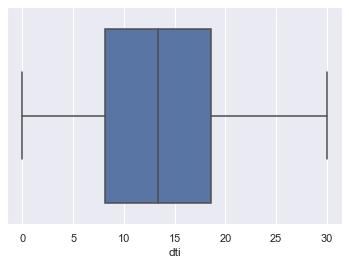

In [130]:
sns.boxplot(df['dti'])